### 2021 Spring "EE479: Scientific Computing & Data"
#### Yong-Hoon Kim, KAIST Electrical Engineering

#### Linge & Langtagen Chs. 4.3.2 ~ 4.3.3: Forward Euler
#### 2021.03.30 Revised from <osc_FE.py>

To solve:
$$(4.43): u'=v, $$
$$(4.44): v'=-\omega^2 u.$$

Algorithm:
$$(4.47): u^{n+1}=u^{n}+\Delta t v^{n} , $$
$$(4.48): v^{n+1}=v^{n}-\Delta t \omega^2 u^{n} , $$

P  = 3.1415927
dt = 0.0785398
T  = 125.6637061
N_t = 1600


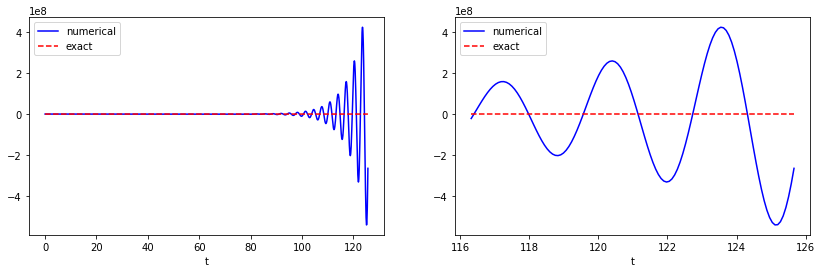

In [7]:
#osc_FE.py
from numpy import zeros, linspace, pi, cos, array
import matplotlib.pyplot as plt

omega = 2
P = 2*pi/omega
dt = P/40     # P/40, P/160, P/2000 in textbook
T = 40*P        # 3P, 20P
N_t = int(round(T/dt))
t = linspace(0, N_t*dt, N_t+1)
print('P  = %.7f' % P)
print('dt = %.7f' % dt)
print('T  = %.7f' % T)
print('N_t =', N_t)

u = zeros(N_t+1)
v = zeros(N_t+1)

# Initial condition
X_0 = 2
u[0] = X_0
v[0] = 0

# Step equations forward in time
for n in range(N_t):
    u[n+1] = u[n] + dt*v[n]
    v[n+1] = v[n] - dt*omega**2*u[n]

fig = plt.figure(figsize=[14,4])
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(t, u, 'b-', label='numerical')
ax1.plot(t, X_0*cos(omega*t), 'r--', label='exact')
ax1.set_xlabel('t')
#ax1.set_ylim(-3,3)
ax1.legend(loc='upper left')

# Plot the last three periods to illustrate the accuracy in long time simulations
N3l = int(round(3*P/dt))  # No of intervals to be plotted
ax2.plot(t[-N3l:], u[-N3l:], 'b-', label='numerical')
ax2.plot(t[-N3l:], X_0*cos(omega*t)[-N3l:], 'r--', label='exact')
ax2.set_xlabel('t')
#ax2.set_ylim(-3,3)
ax2.legend(loc='upper left')

plt.show()
#plt.savefig('tmp.pdf'); plt.savefig('tmp.png')

Since we already know the exact solution as $u(t) = X_0 cos \omega t$, we have reasoned as follows to find an appropriate simulation interval $[0, T]$ and also how many points we should choose. The solution has a period $P = 2\pi/\omega$ (The period $P$ is the time difference between two peaks of the $u(t) ~ cos\omega t$ curve.

Simulating for three periods of the cosine function, $ T = 3P$, and choosing $\Delta t$ such that there are 20 intervals per period gives $\Delta = P/20$ and a total of $N_t = T/\Delta t$ intervals. The rest of the program is a straightforward coding of the Forward Euler scheme.

The discretization parameter $\Delta t$ and see if the reusults become more accurate. The numerical and exact solution for the cases $\Delta t = P/40, P/160, P/2000$.

The conclusion is that the Forward Euler method has a fundamental problem with its growing amplitudes, and that a very small $\Delta t$ is required to achieve satisfactory results. The longer the simulation is, the smaller $\Delta t$ has to be. It is certainly time to look for more effective numerical methods!